In [1]:
import numpy as np

In [15]:
class LogisticRegression:
    def __init__(self, threshold = 0.5, learning_rate = 0.01, max_iterations = 50000):
        self.lr = learning_rate
        self.max_iter = max_iterations
        self.thres = threshold
        self.weights = None
        self.bias = 0
        self.loss_history = []
    
    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))


    def cost(self, logits, y_true):
        """
        Cross entropy loss
        """
        m = len(y_true)
        return np.sum(y_true * np.log(logits) + (1 - y_true) * np.log(1 - logits))/(-m) 
    
    def fit(self, X, y):
        m, n = X.shape
        # he initialization
        self.weights = np.random.randn(n) * np.sqrt(2./n)

        for i in range(self.max_iter):
            z = X @ self.weights + self.bias
            logits = self.sigmoid(z)

            loss = self.cost(logits, y)

            dw = (X.T @ (logits - y))/m
            db = np.sum(logits - y) / m

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.loss_history.append(loss)


    def predict(self, X):
        if self.weights is None:
            self.weights = np.random.randn(1, X.shape[1])
        z =  X @ self.weights+ self.bias
        a = self.sigmoid(z)
        return (a > self.thres).astype(int)






In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(200, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for faster convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train our logistic regression model
model = LogisticRegression(learning_rate=0.1, max_iterations=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


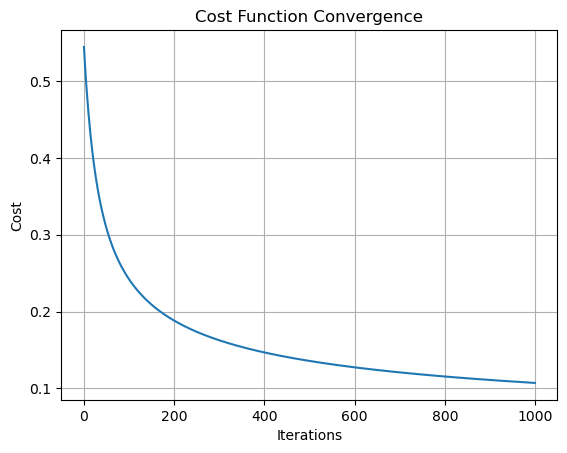

In [18]:
plt.plot(model.loss_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()